#改為94、53、10個神經元，共三層隱藏層
#learning rate改為0.8
#batch size改為80,並訓練25次

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 讀入 Tensorflow

In [3]:
import tensorflow as tf

### 1. 讀入 Fashion MNSIT 數據集

In [4]:
from tensorflow.keras.datasets import fashion_mnist

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

 ### 2. 欣賞數據集內容

In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 Dress


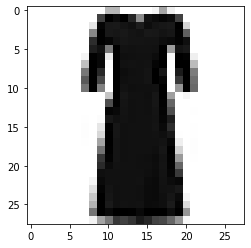

In [9]:
n = 9453
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

x_train[n]

In [10]:
y_train[n]

3

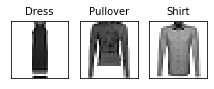

In [11]:
pick = np.random.choice(60000, 3, replace=False)

for i in range(3):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')  

### 3. 資料整理

In [12]:
x_train=x_train/255
x_test=x_test/255

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_train=x_train.reshape(60000,784)

In [15]:
x_train

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
len(x_test)

10000

In [17]:
x_test=x_test.reshape(10000,784)

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train=to_categorical(y_train,10)

In [20]:
y_test=to_categorical(y_test,10)

In [21]:
y_train[9453]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

### 4. 打造神經網路

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [23]:
model=Sequential()

In [24]:
model.add(Dense(94,input_dim=784,activation='relu'))

In [25]:
model.add(Dense(53,activation='relu'))

In [26]:
model.add(Dense(10,activation='softmax'))

In [27]:
model.compile(loss='mse',optimizer=SGD(lr=0.08),metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 94)                73790     
_________________________________________________________________
dense_1 (Dense)              (None, 53)                5035      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                540       
Total params: 79,365
Trainable params: 79,365
Non-trainable params: 0
_________________________________________________________________


### 5.開始訓練神經網路

In [29]:
model.fit(x_train, y_train, batch_size=80, epochs=25) 
#batch_size改為80，改為訓練25次


Train on 60000 samples
Epoch 1/25
60000/60000 [==============================] - 12s 193us/sample - loss: 0.0718 - accuracy: 0.4887
Epoch 2/25
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0454 - accuracy: 0.6695
Epoch 3/25
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0376 - accuracy: 0.7454
Epoch 4/25
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0326 - accuracy: 0.7913
Epoch 5/25
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0296 - accuracy: 0.8081
Epoch 6/25
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0277 - accuracy: 0.8179
Epoch 7/25
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0264 - accuracy: 0.8245
Epoch 8/25
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0254 - accuracy: 0.8295
Epoch 9/25
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0247 - accuracy: 0.8334
Epoc

### 6. 訓練成果


In [30]:
result = model.predict_classes(x_test)

神經網路預測是: 5


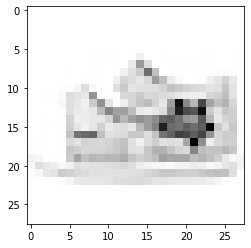

In [31]:
n = 9999

print('神經網路預測是:', result[n])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')


神經網路預測是 2


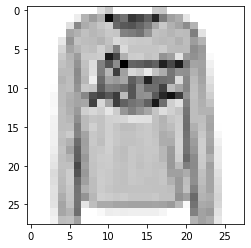

In [32]:
n=520
print('神經網路預測是',result[n])
plt.imshow(x_test[n].reshape(28,28),cmap='Greys')